In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


### EDA

In [3]:
print("Shape of data", train.shape)

Shape of data (1117957, 22)


In [4]:
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 22)


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [6]:
train.isna().sum() / len(train) * 100

id                                 0.0
MonsoonIntensity                   0.0
TopographyDrainage                 0.0
RiverManagement                    0.0
Deforestation                      0.0
Urbanization                       0.0
ClimateChange                      0.0
DamsQuality                        0.0
Siltation                          0.0
AgriculturalPractices              0.0
Encroachments                      0.0
IneffectiveDisasterPreparedness    0.0
DrainageSystems                    0.0
CoastalVulnerability               0.0
Landslides                         0.0
Watersheds                         0.0
DeterioratingInfrastructure        0.0
PopulationScore                    0.0
WetlandLoss                        0.0
InadequatePlanning                 0.0
PoliticalFactors                   0.0
FloodProbability                   0.0
dtype: float64

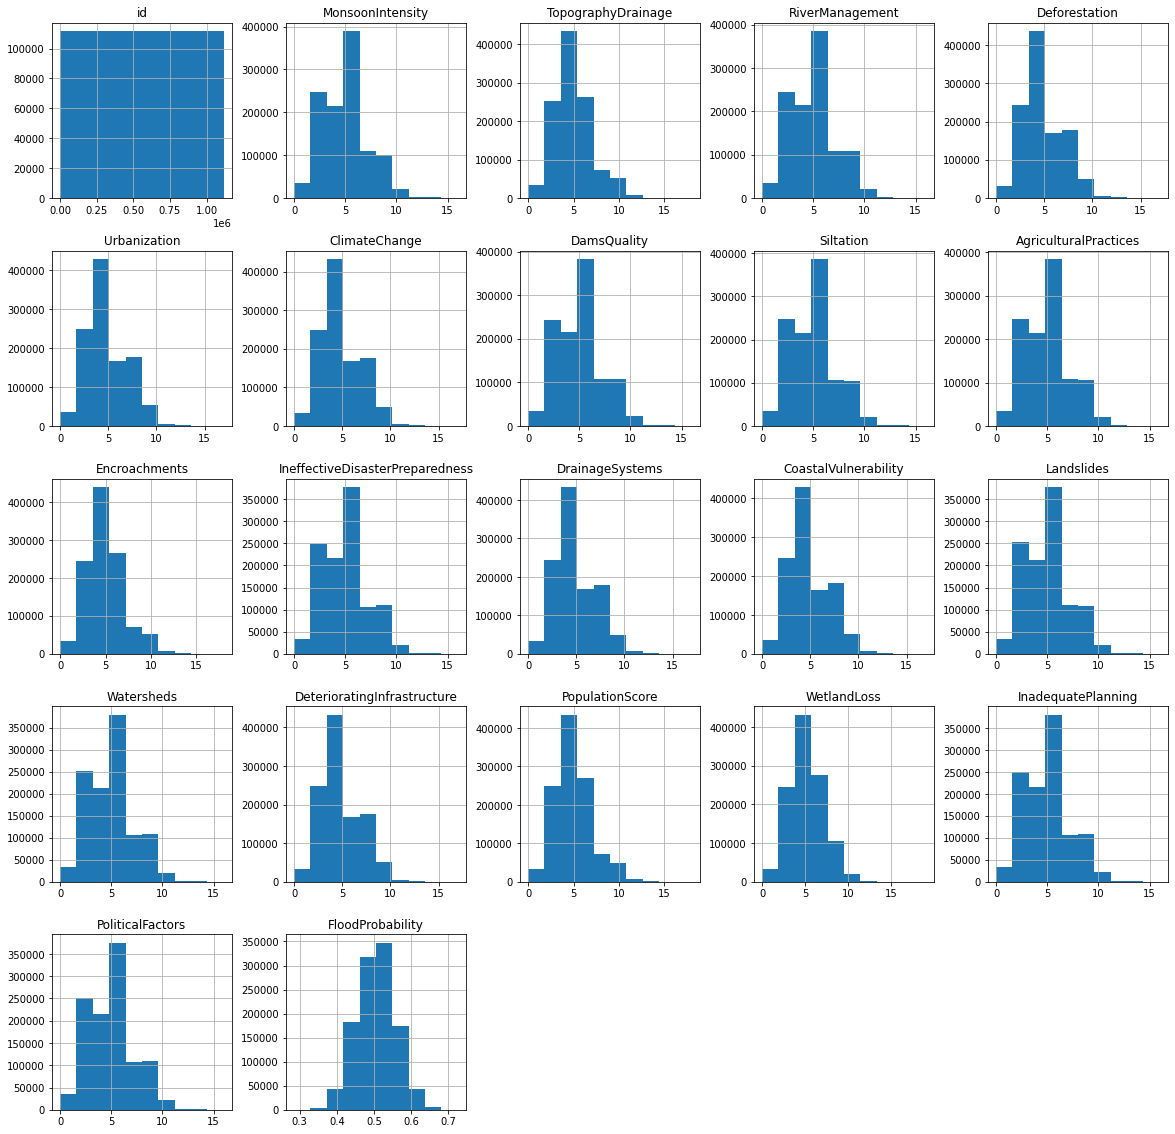

In [7]:
train.hist(figsize=(20,20))
plt.show()

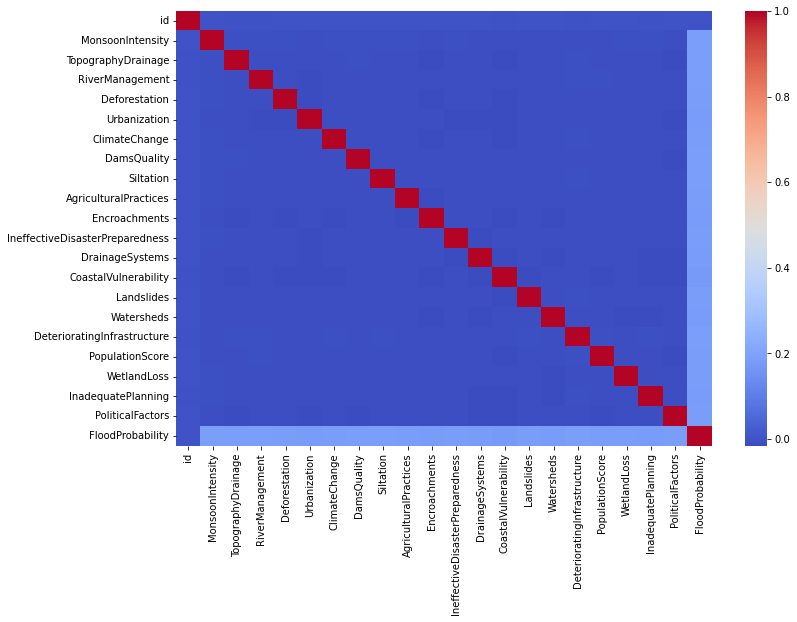

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(train.corr(), annot=False, cmap="coolwarm")
plt.show()

### Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

y = train['FloodProbability']
X = train.drop(columns = ['id', 'FloodProbability'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.01)

In [10]:
def feat_engineering(df):
    sum_feats = df.sum(axis=1)
    df['sum_feats'] = sum_feats
    
    return df

In [11]:
X_train = feat_engineering(X_train)
X_val = feat_engineering(X_val)

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


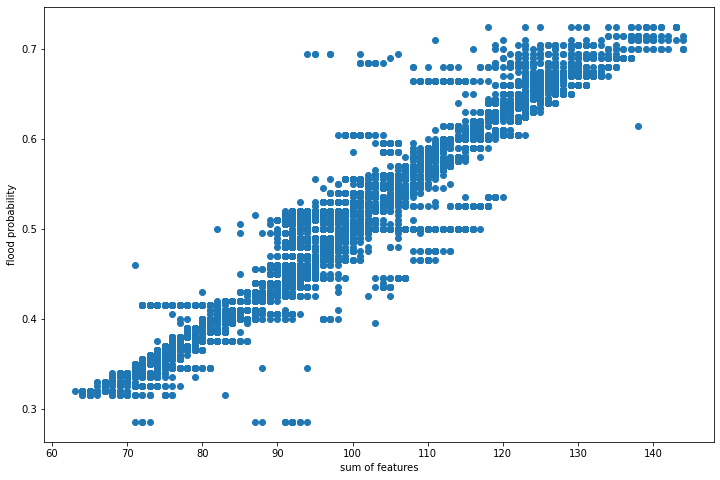

In [12]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train['sum_feats'], y_train)
plt.xlabel('sum of features')
plt.ylabel('flood probability')
plt.show()

### Model

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

xgb = XGBRegressor(n_estimators=500)

start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
print(end - start)

102.07037043571472


### Submission

In [14]:
test = pd.read_csv('test.csv')
ids = test['id']
test = test.drop(['id'], axis=1)
test = feat_engineering(test)

test_pred = xgb.predict(test)
test_pred

array([0.5781053 , 0.45094836, 0.4548039 , ..., 0.61975706, 0.5495188 ,
       0.52743655], dtype=float32)

In [15]:
submit = pd.DataFrame(ids, columns = ['id'])

submit['FloodProbability'] = test_pred

submit.head()

,id,FloodProbability
0,1117957,0.578105
1,1117958,0.450948
2,1117959,0.454804
3,1117960,0.470144
4,1117961,0.468214


In [16]:
submit.to_csv('submission.csv', index=False)

In [17]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
